In [7]:
import struct
from pynq import Overlay
from pynq import DefaultIP
class AddDriver(DefaultIP):
    def __init__(self, description):
        super().__init__(description=description)

    bindto = ['xilinx.com:hls:s_curve:1.0']

    def getfreq(self, nc, k, en):
        scurve.write(0x10,nc) 
        scurve.write(0x18,struct.pack("f", k)) #mimo can only use int ot byte, so converting to byte...
        scurve.write(0x28,en)
        scurve.write(0x00,1)
        while(not(scurve.read(0x24)&1)):
            1
        return struct.unpack("f", struct.pack("I", scurve.read(0x20)))[0] #mimo can only use int ot byte, so converting from byte...
overlay=Overlay('/home/xilinx/pynq/overlays/PWMtest/motionplanner.bit')
scurve=overlay.s_curve
motionplanner=overlay.motion_planner

S-curve generation time for  9000  values:  2.2361085414886475  Seconds
Average Single Value Execution time:  0.0002484565046098497 Seconds


<IPython.core.display.Javascript object>


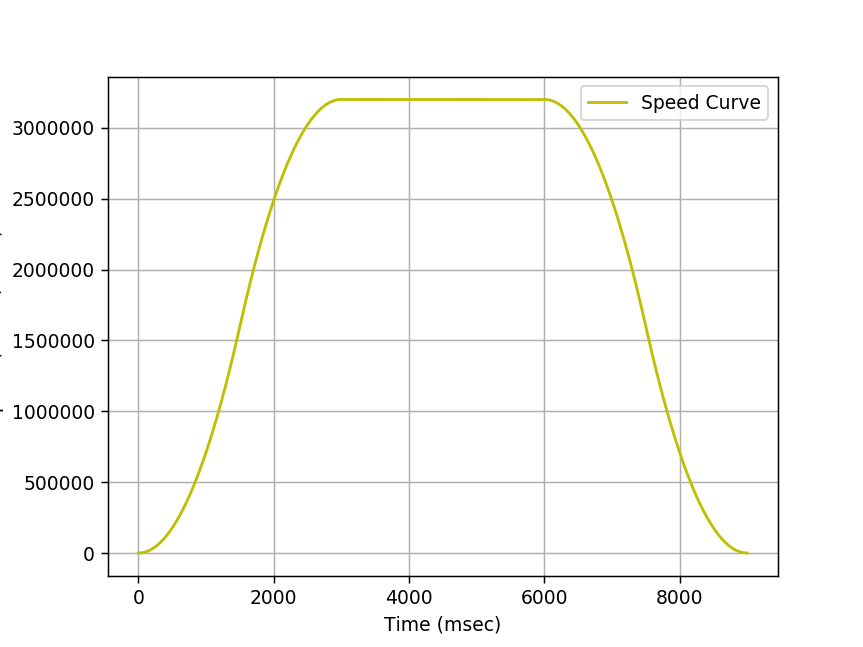

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
#Plotting function
def plot_to_notebook(time_msec,in_signal,n_samples):
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.xlabel('Time (msec)')
    plt.ylabel('Speed (Pulses/msec)')
    plt.grid()
    plt.plot(time_msec,in_signal[:n_samples],'y-',label='Speed Curve')
    plt.legend()
# S-Curve Settings
#planmotion(3200,2133,45)
motionplanner.write(0x10,3200) #Vm
motionplanner.write(0x18,2133) #accel_deccel
motionplanner.write(0x20,45) #rev
motionplanner.write(0x00,1)
nc=0
k=1
en=1
samples=[]
# Total time
T =motionplanner.read(0x28) #T
# Number of samples
n = T
# Time vector in milli-seconds
t = np.linspace(0, T, n, endpoint=False)
start_time = time.time()
for (nc) in range(T):
    samples.append(scurve.getfreq(nc,k,en))
stop_time = time.time()
sw_exec_time = stop_time - start_time
print('S-curve generation time for ',T,' values: ',sw_exec_time,' Seconds')   
print ('Average Single Value Execution time: ',sw_exec_time/T, 'Seconds')
plot_to_notebook(t,samples,n)

In [9]:
import time
motionplanner.write(0x10,3200) #Vm
motionplanner.write(0x18,2133) #accel_deccel
motionplanner.write(0x20,45) #rev
motionplanner.write(0x00,1)
Vm=3200000
nc=0
k=0.00625
en=1
T =motionplanner.read(0x28)
while(1):
    nc=0
    for(nc) in range (T): 
        scurve.getfreq(nc,k,en)
        time.sleep(0.002)

KeyboardInterrupt: 